## 1. 가설 설정
- 공실률의 증감이 상권 발달에 영향을 줄 것이다.

## 2. 가설 설정 배경
- 공실률은 상업용부동산이 비어있는 비율을 의미
    - 기본적으로 공실률이 높을수록 상권이 침체될 것이라 가정함.

## 3. 공실률 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# 공실률 데이터
data = pd.read_csv("한국부동산원_상업용부동산 임대동향조사_임대정보_분기별 지역별 공실률(소규모상가)_20220630.csv",encoding="CP949")
data = data[data['지역'].astype(str).str.contains('서울')] # 서울 지역 데이터만 참고
data = data .sort_values(by='2022_2분기', ascending=False) # 22년도 2분기 기준 내림차순 정렬
data.head()

,지역,2022_1분기,2022_2분기
5,서울 도심 명동,42.1,36.9
22,서울 영등포신촌 당산역,5.1,20.2
15,서울 강남 도산대로,7.4,19.3
27,서울 영등포신촌 홍대/합정,16.7,18.2
44,서울 수유,17.6,17.7


In [2]:
data.tail()

,지역,2022_1분기,2022_2분기
24,서울 영등포신촌 망원역,4.2,0.0
13,서울 강남 남부터미널,0.0,0.0
14,서울 강남 논현역,0.0,0.0
16,서울 강남 신사역,0.0,0.0
29,서울 가락시장,0.0,0.0


## 4. 상권변화지표(HHLL) 데이터 준비
- 22년도 2분기 데이터를 기준으로 함.

In [3]:
import pandas as pd
data1 = pd.read_csv("1. 서울시 상권분석서비스(자치구별 상권변화지표).csv", encoding="CP949")
df_s = data1[data1['기준_년_코드'].astype(str).str.contains('2022') 
             & data1['기준_분기_코드'].astype(str).str.contains('2')] # 22년도 2분기 데이터만 추출

df_s

,기준_년_코드,기준_분기_코드,시군구_코드,시군구_코드_명,상권_변화_지표,상권_변화_지표_명,운영_영업_개월_평균,폐업_영업_개월_평균,서울_운영_영업_개월_평균,서울_폐업_영업_개월_평균
75,2022,2,11740,강동구,LL,다이나믹,114,52,121,55
76,2022,2,11710,송파구,LL,다이나믹,119,55,121,55
77,2022,2,11680,강남구,LL,다이나믹,113,51,121,55
78,2022,2,11650,서초구,HH,정체,131,56,121,55
79,2022,2,11620,관악구,LL,다이나믹,117,53,121,55
80,2022,2,11590,동작구,HH,정체,124,59,121,55
81,2022,2,11560,영등포구,HH,정체,125,56,121,55
82,2022,2,11545,금천구,LL,다이나믹,115,53,121,55
83,2022,2,11530,구로구,HL,상권축소,123,54,121,55
84,2022,2,11500,강서구,LL,다이나믹,101,51,121,55


## 5. 분석방법
- 상권변화지표 데이터를 HH, LH, HL, LL 각각의 지표별로 분할.
    - 그 후 지표별로 평균공실률을 계산하여 비교.

In [4]:
# 각각의 지표별로 변수화
df_HL = df_s[df_s['상권_변화_지표']=='HL']
df_LH = df_s[df_s['상권_변화_지표']=='LH']
df_HH = df_s[df_s['상권_변화_지표']=='HH']
df_LL = df_s[df_s['상권_변화_지표']=='LL']

In [5]:
df_LL['시군구_코드_명'].unique() # LL에 속하는 자치구

array(['강동구', '송파구', '강남구', '관악구', '금천구', '강서구', '양천구', '마포구', '은평구',
       '노원구', '도봉구', '강북구', '중랑구', '광진구'], dtype=object)

In [6]:
df_LH['시군구_코드_명'].unique() # LH에 속하는 자치구

array(['성동구'], dtype=object)

In [7]:
df_HL['시군구_코드_명'].unique() # HL에 속하는 자치구

array(['구로구'], dtype=object)

In [8]:
df_HH['시군구_코드_명'].unique() # HH에 속하는 자치구

array(['서초구', '동작구', '영등포구', '서대문구', '성북구', '동대문구', '용산구', '중구', '종로구'],
      dtype=object)

## 6. 상권변화지표(HHLL)별 평균 공실률 계산
- 각 상권변화지표에 속하는 자치구들을 참고함.
    - 가령 HH 지표를 가지는 자치구들에 속하는 상권들은 마찬가지로 HH 지표를 가진다고 가정.
        - 이후 HH 지표에 배정한 상권들의 공실률 평균치를 계산하는 식.

### 6.1. HH 지표 상권들

In [9]:
HH = data[data['지역'].astype(str).str.contains('도심') # 중구 및 종로구
|data['지역'].astype(str).str.contains('당산역')| data['지역'].astype(str).str.contains('영등포역') # 영등포구
|data['지역'].astype(str).str.contains('신촌/이대') # 서대문구
|data['지역'].astype(str).str.contains('교대역')| data['지역'].astype(str).str.contains('남부터미널')] # 서초구
HH

,지역,2022_1분기,2022_2분기
5,서울 도심 명동,42.1,36.9
22,서울 영등포신촌 당산역,5.1,20.2
25,서울 영등포신촌 신촌/이대,13.8,9.0
1,서울 도심,8.8,7.7
8,서울 도심 종로,7.1,7.1
9,서울 도심 충무로,5.9,7.1
3,서울 도심 남대문,6.9,6.9
7,서울 도심 을지로,5.6,5.6
6,서울 도심 시청,5.6,5.6
4,서울 도심 동대문,3.4,3.4


In [10]:
# HH 지표인 상권들의 평균 공실률
HH_m= HH.mean()
HH_m

C:\Users\defy2\AppData\Local\Temp\ipykernel_7608\3017096359.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  HH_m= HH.mean()


2022_1분기    8.642857
2022_2분기    8.142857
dtype: float64

### 6.2. HL 지표 상권들

In [11]:
HL = data[data['지역'].astype(str).str.contains('오류동역')] # 구로구
HL

,지역,2022_1분기,2022_2분기
48,서울 오류동역,5.5,5.5


In [12]:
# HL 지표인 상권들의 평균 공실률
HL_m = HL.mean()
HL_m

C:\Users\defy2\AppData\Local\Temp\ipykernel_7608\965467842.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  HL_m = HL.mean()


2022_1분기    5.5
2022_2분기    5.5
dtype: float64

### 6.3. LH 지표 상권들

In [13]:
LH = data[data['지역'].astype(str).str.contains('왕십리')| data['지역'].astype(str).str.contains('뚝섬')] # 성동구
LH

,지역,2022_1분기,2022_2분기
35,서울 뚝섬,6.3,4.9
49,서울 왕십리,0.0,0.0


In [14]:
# LH 지표인 상권들의 평균 공실률
LH_m=LH.mean()
LH_m

C:\Users\defy2\AppData\Local\Temp\ipykernel_7608\2580391305.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  LH_m=LH.mean()


2022_1분기    3.15
2022_2분기    2.45
dtype: float64

### 6.4. LL 지표 상권들

In [15]:
LL= data[data['지역'].astype(str).str.contains('상봉역') #중랑구
| data['지역'].astype(str).str.contains('강남') # 강남구
| data['지역'].astype(str).str.contains('수유') #강북구
| data['지역'].astype(str).str.contains('천호') #강동구
| data['지역'].astype(str).str.contains('화곡') #강서구
| data['지역'].astype(str).str.contains('신림') #서울대입구
| data['지역'].astype(str).str.contains('독산') #금천구
| data['지역'].astype(str).str.contains('건대입구')| data['지역'].astype(str).str.contains('군자') #광진구
| data['지역'].astype(str).str.contains('상계역') #노원구
| data['지역'].astype(str).str.contains('영등포신촌') #머포구
| data['지역'].astype(str).str.contains('잠실')| data['지역'].astype(str).str.contains('가락시장') #송파구
| data['지역'].astype(str).str.contains('목동')] #양천구
LL = LL[LL['지역'] != '서울 영등포신촌 당산역']
LL

,지역,2022_1분기,2022_2분기
15,서울 강남 도산대로,7.4,19.3
27,서울 영등포신촌 홍대/합정,16.7,18.2
44,서울 수유,17.6,17.7
58,서울 화곡,15.8,14.0
25,서울 영등포신촌 신촌/이대,13.8,9.0
30,서울 건대입구,0.0,8.8
20,서울 영등포신촌,7.4,8.3
52,서울 잠실/송파,6.7,6.7
40,서울 상계역,2.6,6.6
18,서울 강남 청담,4.2,4.2


In [16]:
# LL 지표인 상권들의 평균 공실률
LL_m = LL.mean()
LL_m

C:\Users\defy2\AppData\Local\Temp\ipykernel_7608\3666872511.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  LL_m = LL.mean()


2022_1분기    5.450000
2022_2분기    4.646667
dtype: float64

## 7. HHLL 지표별 공실률 비교
- 22년도 2분기 데이터를 기준으로 함.

C:\Users\defy2\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\defy2\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\defy2\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\defy2\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\defy2\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:

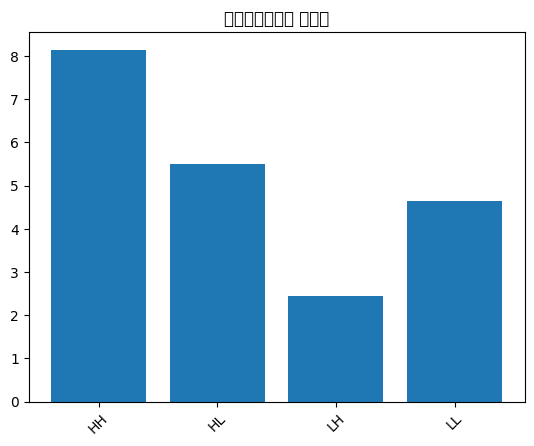

In [17]:
import matplotlib.pyplot as plt
y=[]
y.append(HH_m['2022_2분기'])
y.append(HL_m['2022_2분기'])
y.append(LH_m['2022_2분기'])
y.append(LL_m['2022_2분기'])
x= ['HH','HL','LH','LL']
plt.bar(x,y)
plt.title('상권변화지표별 공실률')
plt.xticks(rotation=45)
plt.show()

## 8. 분석 결과
- 공실률이 높은 순서는 다음과 같다.
    - 1. HH(정체) : 8.14%
    - 2. HL(상권축소) : 5.5%
    - 3. LL(다이나믹) : 4.64%
    - 4. LH(상권확장) : 2.45%